# Importing and data preparation

In [1]:
import pandas as pd

In [2]:
'''file permission needs to be set accessible to all that have the link!'''
url_orderlines  = "https://drive.google.com/file/d/1LraLLVLIIkD_4cJ83jQ-kDial9nNvxKk/view?usp=drive_link"
url_brands      = 'https://drive.google.com/file/d/1K8IdztNlR7UA9QkWii2CpZUEslvz7tUh/view?usp=drive_link'
url_orders      = 'https://drive.google.com/file/d/1zwwDSJfshd1sCYpSpodTL0puxc9RSLAC/view?usp=drive_link'
url_products    = 'https://drive.google.com/file/d/1hmTeVVEuhXx7klBI-1yY0Tl1Qh6psZGB/view?usp=drive_link'

path_orderlines = "https://drive.google.com/uc?export=download&id=" + url_orderlines.split("/")[-2]
path_brands     = "https://drive.google.com/uc?export=download&id=" + url_brands.split("/")[-2]
path_orders     = "https://drive.google.com/uc?export=download&id=" + url_orders.split("/")[-2]
path_products   = "https://drive.google.com/uc?export=download&id=" + url_products.split("/")[-2]

In [3]:
# read quality_controlled dfs
orderlines_df   = pd.read_csv(path_orderlines)
brands_df       = pd.read_csv(path_brands)
orders_df       = pd.read_csv(path_orders)
products_df     = pd.read_csv(path_products)

# create copy dfs to work with:
orderlines  = orderlines_df.copy()
brands      = brands_df.copy()
orders      = orders_df.copy()
products    = products_df.copy()

# make date cols to datetime again
orders["created_date"] = pd.to_datetime(orders["created_date"])
orderlines["date"] = pd.to_datetime(orderlines["date"])

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          40985 non-null  int64         
 1   created_date      40985 non-null  datetime64[ns]
 2   total_paid        40985 non-null  float64       
 3   state             40985 non-null  object        
 4   unit_price_total  40985 non-null  float64       
 5   price_diff        40985 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [5]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   unit_price_total  53231 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 3.2+ MB


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB


In [7]:
orderlines = orderlines.merge(right=products[['sku', 'price']],
                 how='left', on='sku')

In [8]:
orderlines = orderlines.rename(columns={'price': 'prod_price'})
orderlines['discount'] = orderlines.prod_price - orderlines.unit_price
orderlines['discount_percent'] = (orderlines.discount / orderlines.prod_price).round(2)*100
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,prod_price,discount,discount_percent
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,13.50,22.0
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,3.96,17.0
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,16.81,19.0
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,16.09,21.0
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,157.50,53.0


In [9]:
orderlines.discount.describe()

count    53231.000000
mean        26.116673
std         45.545881
min       -170.990000
25%          5.250000
50%         15.000000
75%         31.000000
max       1320.000000
Name: discount, dtype: float64

In [10]:
orderlines.discount_percent.describe()

count    53231.000000
mean        21.370987
std         18.133347
min       -212.000000
25%          9.000000
50%         18.000000
75%         29.000000
max         97.000000
Name: discount_percent, dtype: float64

In [11]:
orderlines.loc[orderlines.discount < 0].count()#head(10)

id                  1571
id_order            1571
product_id          1571
product_quantity    1571
sku                 1571
unit_price          1571
date                1571
unit_price_total    1571
prod_price          1571
discount            1571
discount_percent    1571
dtype: int64

# Discount exploratory plots

<Axes: xlabel='prod_price', ylabel='discount'>

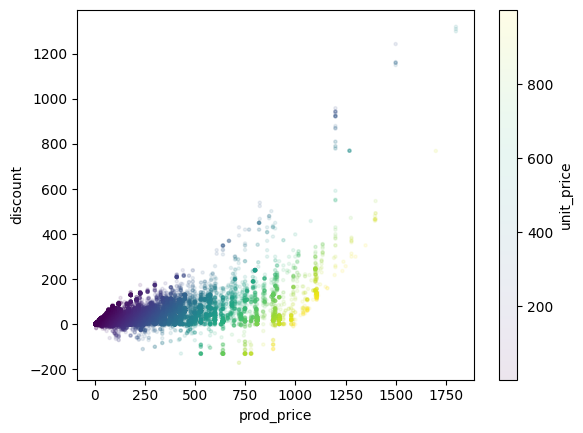

In [12]:
orderlines.plot.scatter(x='prod_price', y='discount', c='unit_price',
                               alpha=0.1, marker='.')

# above 1000€ base price, each sold product got a discount

In [13]:
# calculate the quartiles
Q1 = orderlines.discount.quantile(0.25)
Q3 = orderlines.discount.quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
#orderlines_filtered = orderlines.loc[(orderlines.discount >= (Q1 - 1.5*IQR))
#                                    & (orderlines.discount <= (Q3 + 1.5*IQR))]

# filter the DataFrame to include only positive discount values
orderlines_filtered = orderlines.loc[orderlines.discount > 0]

<Axes: xlabel='prod_price', ylabel='discount_percent'>

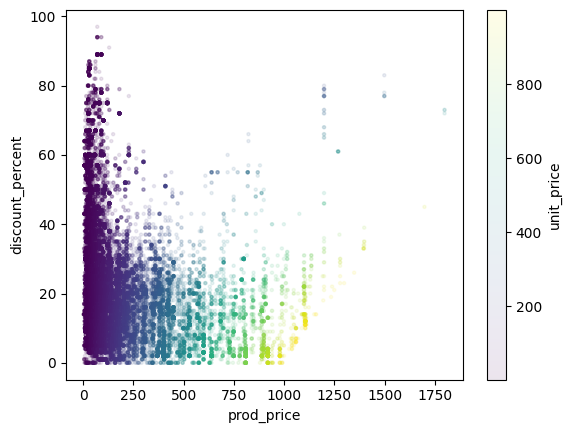

In [14]:
orderlines_filtered.plot.scatter(x='prod_price', y='discount_percent', c='unit_price',
                                    alpha=0.1, marker='.')

<Axes: >

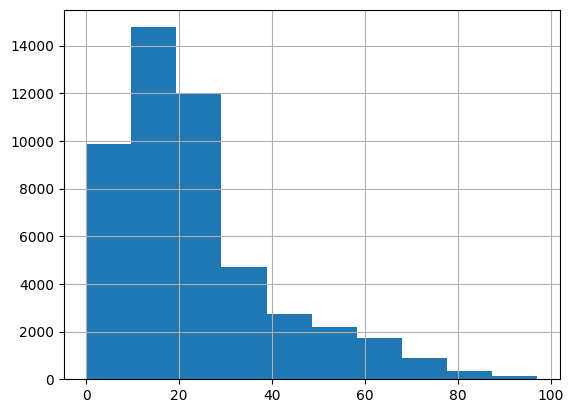

In [15]:
orderlines_filtered.discount_percent.hist()

# Discount over time

<ipython-input-16-d0e4d317da7a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orderlines_weekly_resampled = orderlines_filtered.resample('W', on='date').mean()


<Axes: xlabel='date'>

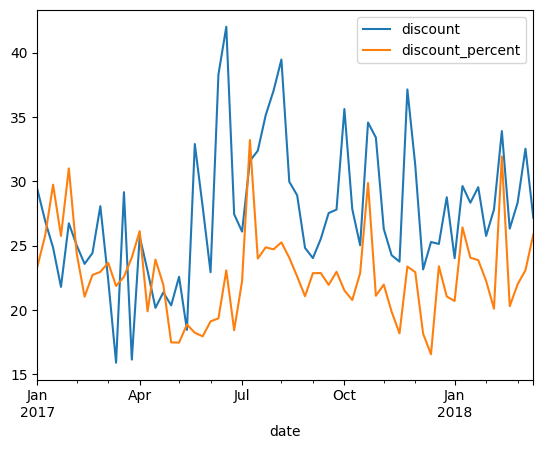

In [16]:
orderlines_weekly_resampled = orderlines_filtered.resample('W', on='date').mean()
orderlines_weekly_resampled.plot(y=['discount', 'discount_percent'])

<ipython-input-17-068301376992>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orderlines_daily_resampled = orderlines_filtered.resample('D', on='date').mean()


<Axes: xlabel='date'>

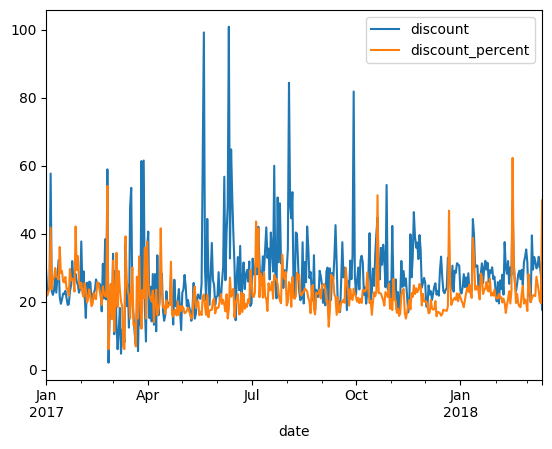

In [17]:
orderlines_daily_resampled = orderlines_filtered.resample('D', on='date').mean()
orderlines_daily_resampled.plot(y=['discount', 'discount_percent'])

# Product categories

In [18]:
# Products categorising


# add category column to products
products["category"] = ""

#get count of products based on type column
products.groupby(["type"]).agg({"sku":"count"}).sort_values(by='sku' , ascending=False)

#Assign categories based on type
products.loc[products["type"]=="11865403", "category"] = "iPhone accessories"
products.loc[products["type"]=="12175397", "category"] = "Servers"
# can we combine 1298 and 1282 as Mac and accessories
products.loc[products["type"]=="1298", "category"] = "Macbook "
products.loc[products["type"]=="1,02E+12", "category"] = "Apple MacBook "
products.loc[products["type"]=="1282", "category"] = "Mac and accessories"
products.loc[products["type"]=="13835403", "category"] = "Macbook case and Backpacks"
products.loc[products["type"]=="11935397", "category"] = "External Storage"
products.loc[products["type"]=="57445397", "category"] = "Memory card"
products.loc[products["type"]=="11905404", "category"] = "Drones, smartwatch, security systems"
products.loc[products["type"]=="12635403", "category"] = "iPad accessories"
products.loc[products["type"]=="5,74E+15", "category"] = "iMac"
products.loc[products["type"]=="1364", "category"] = "iMac accessories"
products.loc[products["type"]=="12585395", "category"] = "Adapters"
products.loc[products["type"]=="1296", "category"] = "Monitors"
products.loc[products["type"]=="1325", "category"] = "Cables"
products.loc[products["type"]=="5384", "category"] = "Headphones and accessories"
products.loc[products["type"]=="1433", "category"] = "Installation/Upgrade Kit"
products.loc[products["type"]=="12215397", "category"] = "???"
products.loc[products["type"]=="5398", "category"] = "Speakers"
products.loc[products["type"]=="1,44E+11", "category"] = "iPhone/iPad repair service"


In [19]:
products.head(10)

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,iMac accessories
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45.00,0,1230,
6,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,0,1364,iMac accessories
7,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,36.99,0,1364,iMac accessories
8,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO...,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,74.00,0,1364,iMac accessories
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,35.00,0,1325,Cables


In [20]:
products.category.value_counts()

                                        3104
iPhone accessories                      1057
Servers                                  939
Macbook                                  783
External Storage                         562
Drones, smartwatch, security systems     454
Mac and accessories                      373
iPad accessories                         362
Macbook case and Backpacks               269
iMac                                     247
iMac accessories                         216
Adapters                                 190
Monitors                                 187
Cables                                   183
Headphones and accessories               178
Installation/Upgrade Kit                 171
???                                      170
Speakers                                 159
Apple MacBook                            130
Memory card                              129
iPhone/iPad repair service               129
Name: category, dtype: int64

# Discount categories

In [21]:
orderlines = orderlines.merge(right=products[['sku', 'category']],
                 how='left', on='sku')

#orderlines.info()

In [39]:
# create discount categories

orderlines['discount_cat'] = ''

orderlines.loc[orderlines.discount_percent.between(left=0, right=5), 'discount_cat'] = '0-5%'
orderlines.loc[orderlines.discount_percent.between(left=5, right=15), 'discount_cat'] = '5-15%'
orderlines.loc[orderlines.discount_percent.between(left=15, right=35), 'discount_cat'] = '15-35%'
orderlines.loc[orderlines.discount_percent > 35, 'discount_cat'] = '>35%'
orderlines.loc[orderlines.discount_percent < 0, 'discount_cat'] = '<0%'

#orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   unit_price_total  53231 non-null  float64       
 8   prod_price        53231 non-null  float64       
 9   discount          53231 non-null  float64       
 10  discount_percent  53231 non-null  float64       
 11  category          53231 non-null  object        
 12  discount_cat      53231 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(3)
memory usage: 5.7+ MB


In [40]:
orderlines.discount_cat.value_counts()
#orderlines.head()

15-35%    22708
5-15%     14042
>35%       8977
0-5%       6656
<0%         848
Name: discount_cat, dtype: int64

## Discount by product

In [41]:
# get products that appear in many sales
multi_sales = orderlines.groupby(by='sku')['sku'].count()
multi_sales = multi_sales.loc[multi_sales > 100] # n times!!!

# filter orderlines for products that were sold multiple times
ol_multi = orderlines.loc[orderlines.sku.isin(multi_sales.index.unique())].copy()

In [42]:
# get top 20 products by total item sales
top20 = (orderlines.groupby(by='sku')
                .agg({'product_quantity': 'sum'})
                .nlargest(20, 'product_quantity').index
)


ol_top20 = orderlines.loc[orderlines.sku.isin(top20)].copy()
ol_top20 = (ol_top20
            .groupby(by=['sku', 'discount_cat'])
            .agg({'product_quantity': 'sum'}))
#ol_top20

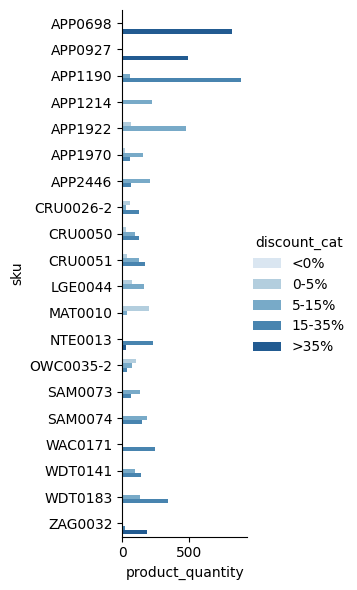

In [44]:
import seaborn as sns

hue_order = ['<0%', '0-5%', '5-15%', '15-35%', '>35%']

sns.catplot(kind="bar",
            data=ol_top20,
            x="product_quantity",
            y="sku",
            height=6,
            aspect=0.5,
            palette="Blues",
            hue='discount_cat', hue_order=hue_order,
            )

## Discount by product category

In [111]:
# choose categories for analysis
cats = products.category.unique()[1:] # list of all named product categories
custom_cats = ['iMac accessories', 'Cables', 'Headphones and accessories',
       'Macbook case and Backpacks', 'iPhone accessories',
       'Drones, smartwatch, security systems', 'iPad accessories',
       'Monitors', 'External Storage',
       'Memory card', 'Speakers',
       'Macbook ', 'Adapters', 'iMac',
       'Apple MacBook ']
cats
custom_cats

['iMac accessories',
 'Cables',
 'Headphones and accessories',
 'Macbook case and Backpacks',
 'iPhone accessories',
 'Drones, smartwatch, security systems',
 'iPad accessories',
 'Monitors',
 'External Storage',
 'Memory card',
 'Speakers',
 'Macbook ',
 'Adapters',
 'iMac',
 'Apple MacBook ']

In [203]:
# get orderlines that fit to product categories
ol_top_cats = orderlines.loc[orderlines.category.isin(custom_cats)].copy()
#ol_top_cats

# group and calculate stats
ol_top_cats = (ol_top_cats
            .groupby(by=['category', 'discount_cat'])
            .agg({'product_quantity': 'sum', 'unit_price_total': 'sum'}))

ol_top_cats['prod_sale_increase'] = 0
ol_top_cats['revenue_change'] = 0
ol_top_cats.rename(columns={'unit_price_total': 'revenue'}, inplace=True)
ol_top_cats

product_quantity   revenue  \
category           discount_cat                               
Adapters           0-5%                       132  11082.20   
                   15-35%                     850  46797.04   
                   5-15%                      580  43008.56   
                   >35%                       461  10860.53   
Cables             0-5%                       150   5127.03   
...                                           ...       ...   
iPad accessories   >35%                       268   9952.03   
iPhone accessories 0-5%                       147   5011.37   
                   15-35%                    2000  58999.09   
                   5-15%                      968  34291.44   
                   >35%                      1478  24890.22   

                                 prod_sale_increase  revenue_change  
category           discount_cat                                      
Adapters           0-5%                           0               0  
                   15-35%                         0               0  
                   5-15%                          0               0  
                   >35%                           0               0  
Cables             0-5%                           0               0  
...                                             ...             ...  
iPad accessories   >35%                           0               0  
iPhone accessories 0-5%                           0               0  
                   15-35%                         0               0  
                   5-15%                          0               0  
                   >35%                           0               0  

[62 rows x 4 columns]

In [206]:
# calculate sales change for discount categories
def sales_change(df, cat):
    base_quant = df.loc[(cat, '0-5%'), 'product_quantity']
    base_rev = df.loc[(cat, '0-5%'), 'revenue']
    for idx in df.loc[(cat)].index:
        df.loc[(cat, idx), 'prod_sale_increase'] = df.loc[(cat, idx), 'product_quantity']/base_quant
        df.loc[(cat, idx), 'revenue_change'] = df.loc[(cat, idx), 'revenue']/base_rev

for idx in ol_top_cats.index.levels[0]:
    sales_change(ol_top_cats, idx)

In [207]:
ol_top_cats

product_quantity   revenue  \
category           discount_cat                               
Adapters           0-5%                       132  11082.20   
                   15-35%                     850  46797.04   
                   5-15%                      580  43008.56   
                   >35%                       461  10860.53   
Cables             0-5%                       150   5127.03   
...                                           ...       ...   
iPad accessories   >35%                       268   9952.03   
iPhone accessories 0-5%                       147   5011.37   
                   15-35%                    2000  58999.09   
                   5-15%                      968  34291.44   
                   >35%                      1478  24890.22   

                                 prod_sale_increase  revenue_change  
category           discount_cat                                      
Adapters           0-5%                    1.000000        1.000000  
                   15-35%                  6.439394        4.222721  
                   5-15%                   4.393939        3.880868  
                   >35%                    3.492424        0.979998  
Cables             0-5%                    1.000000        1.000000  
...                                             ...             ...  
iPad accessories   >35%                    4.000000        1.003301  
iPhone accessories 0-5%                    1.000000        1.000000  
                   15-35%                 13.605442       11.773046  
                   5-15%                   6.585034        6.842728  
                   >35%                   10.054422        4.966750  

[62 rows x 4 columns]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


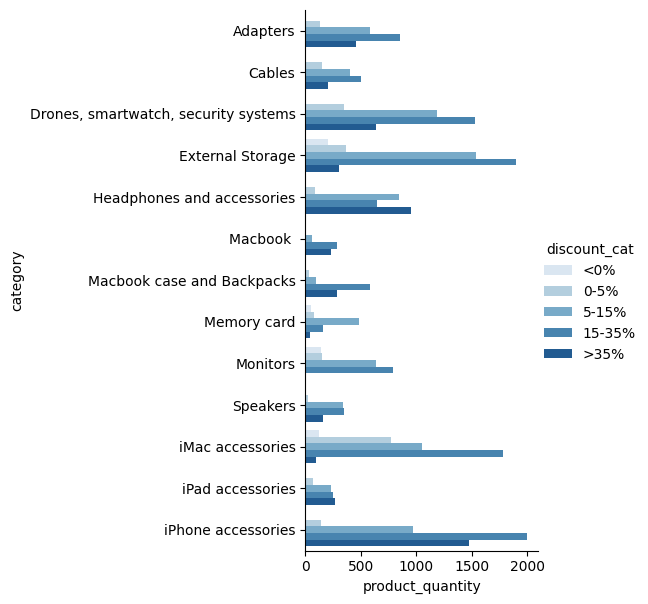

In [197]:
hue_order = ['<0%', '0-5%', '5-15%', '15-35%', '>35%']

sns.catplot(kind="bar",
            data=ol_top_cats,
            x="product_quantity",
            y="category",
            height=6,
            aspect=0.5,
            palette="Blues",
            hue='discount_cat', hue_order=hue_order,
            )

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


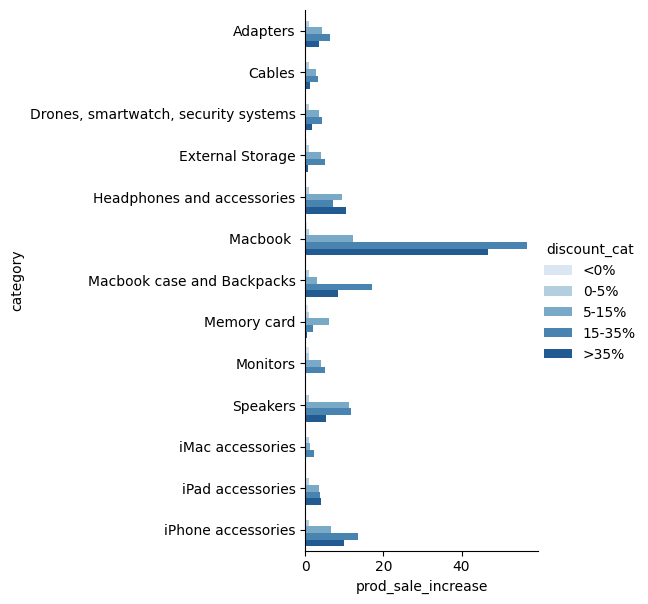

In [198]:
hue_order = ['<0%', '0-5%', '5-15%', '15-35%', '>35%']

sns.catplot(kind="bar",
            data=ol_top_cats,
            x="prod_sale_increase",
            y="category",
            height=6,
            aspect=0.5,
            palette="Blues",
            hue='discount_cat', hue_order=hue_order,
            )

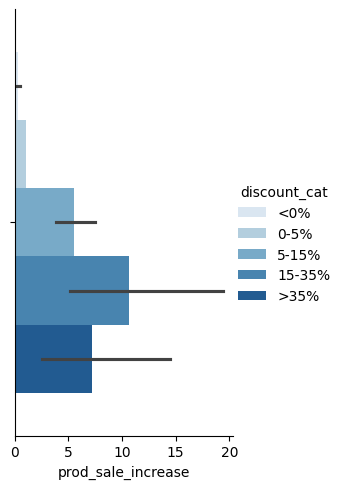

In [199]:
hue_order = ['<0%', '0-5%', '5-15%', '15-35%', '>35%']

sns.catplot(kind="bar",
            data=ol_top_cats,
            x="prod_sale_increase",
            #y="discount_cat",
            height=5,
            aspect=0.5,
            palette="Blues",
            hue='discount_cat',
            hue_order=hue_order,
            )

## Revenue by discount category

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


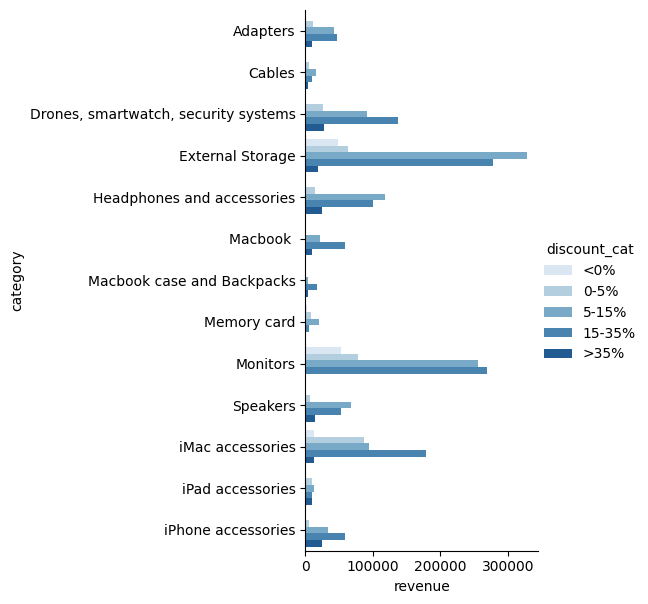

In [200]:
hue_order = ['<0%', '0-5%', '5-15%', '15-35%', '>35%']

sns.catplot(kind="bar",
            data=ol_top_cats,
            x="revenue",
            y="category",
            height=6,
            aspect=0.5,
            palette="Blues",
            hue='discount_cat', hue_order=hue_order,
            )

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


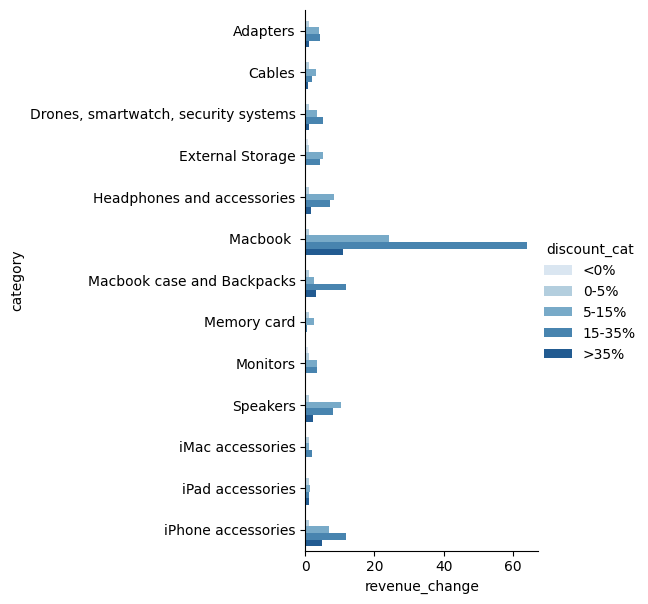

In [208]:
hue_order = ['<0%', '0-5%', '5-15%', '15-35%', '>35%']

sns.catplot(kind="bar",
            data=ol_top_cats,
            x="revenue_change",
            y="category",
            height=6,
            aspect=0.5,
            palette="Blues",
            hue='discount_cat', hue_order=hue_order,
            )

How should products be classified into different categories to simplify reports and analysis? Priya

What is the distribution of product prices across different categories? Priya

How many products are being discounted? Philip

How big are the offered discounts as a percentage of the product prices? Philip

How do seasonality and special dates (Christmas, Black Friday) affect sales? Eugenio

How could data collection be improved? Eugenio


## Number of discounted products

insights:
*   most products are sold while discounted (ca. 85%) vs. without discount (ca. 15%).
*   products over 1000€ are sold *exclusively* while discounted!



In [132]:
orderlines.discount_cat.value_counts()

15-35%    22708
5-15%     14042
>35%       8977
0-5%       6656
<0%         848
Name: discount_cat, dtype: int64

In [131]:
orderlines.discount_cat.value_counts(normalize=True)

15-35%    0.426594
5-15%     0.263794
>35%      0.168642
0-5%      0.125040
<0%       0.015931
Name: discount_cat, dtype: float64

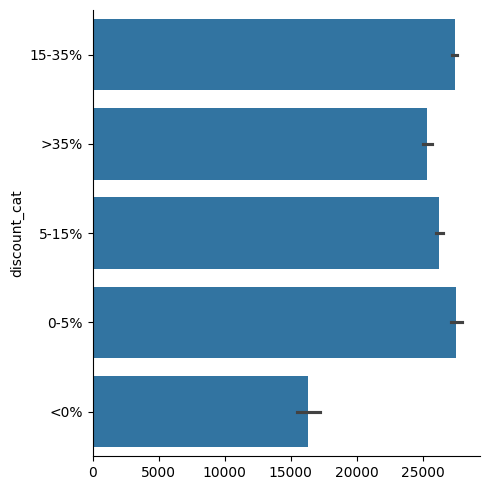

In [176]:
hue_order = ['<0%', '0-5%', '5-15%', '15-35%', '>35%']

sns.catplot(kind="bar",
            data=orderlines.discount_cat,
            #x='discount_cat',#.value_counts(),
            #y="discount_cat",
            height=5,
            aspect=1,
            #palette="Blues",
            #hue='discount_cat',
            #hue_order=hue_order,
            )

## Discount sizes

*   discounts range from -200% (price doubled) to 97% (almost for free)
*   mean and median discount ca. 20%

In [136]:
orderlines.discount_percent.describe()

count    53231.000000
mean        21.370987
std         18.133347
min       -212.000000
25%          9.000000
50%         18.000000
75%         29.000000
max         97.000000
Name: discount_percent, dtype: float64

<Axes: >

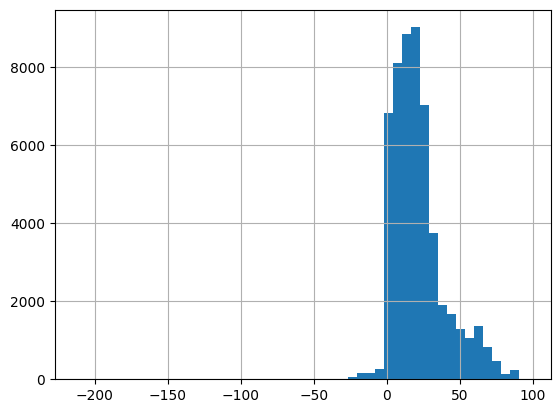

In [154]:
orderlines.discount_percent.hist(bins=50)

<Axes: xlabel='discount_percent'>

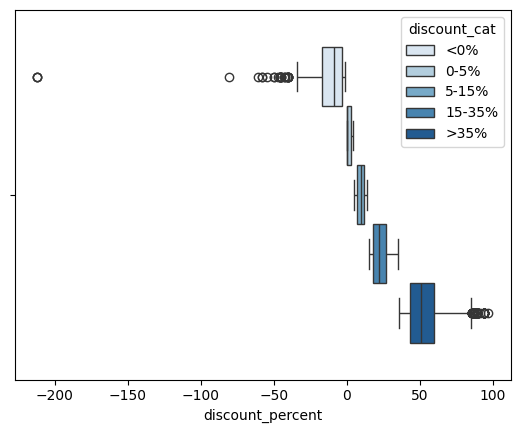

In [156]:
sns.boxplot(data=orderlines,
            x='discount_percent',
            #y='discount_cat',
            palette="Blues",
            hue='discount_cat',
            hue_order=hue_order,
            )

<ipython-input-153-5be1242639dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=orderlines,


<Axes: xlabel='discount_percent', ylabel='category'>

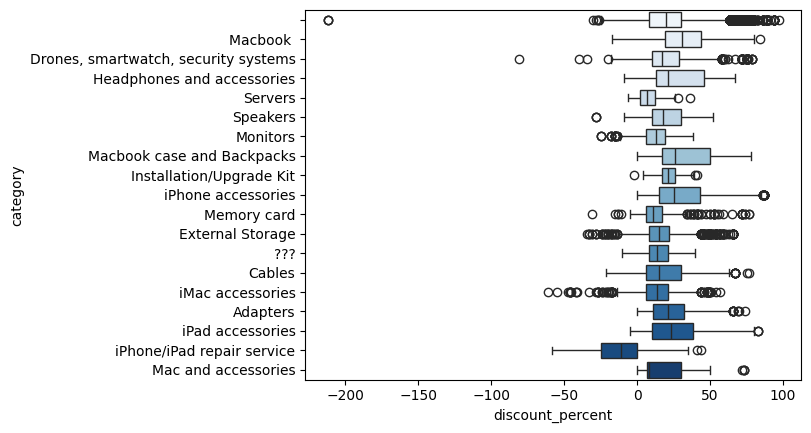

In [153]:
hue_order = ['<0%', '0-5%', '5-15%', '15-35%', '>35%']

sns.boxplot(data=orderlines,
            x='discount_percent',
            y='category',
            palette="Blues",
            #hue='discount_cat',
            #hue_order=hue_order,
            )

In [149]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   unit_price_total  53231 non-null  float64       
 8   prod_price        53231 non-null  float64       
 9   discount          53231 non-null  float64       
 10  discount_percent  53231 non-null  float64       
 11  category          53231 non-null  object        
 12  discount_cat      53231 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(3)
memory usage: 5.7+ MB
